In [1]:
print("hi")

hi


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')
import pickle



In [3]:
train = pd.read_csv('train.csv')
test =  pd.read_csv('test.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

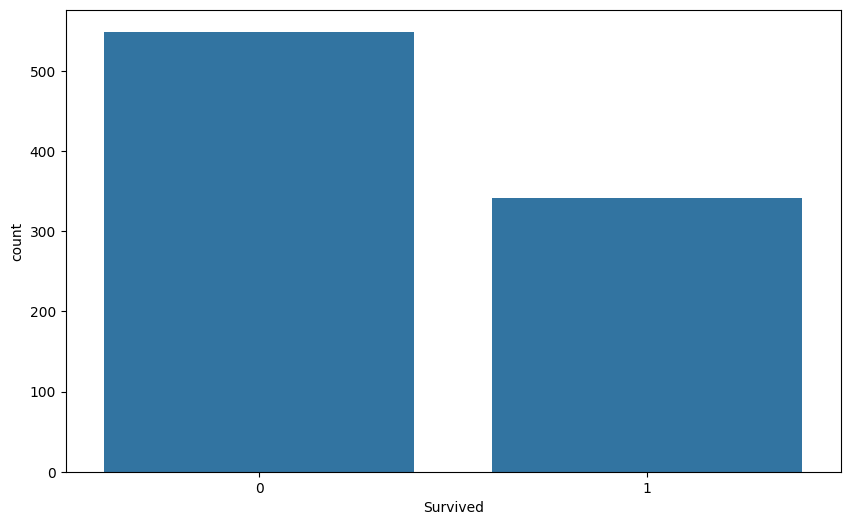

In [7]:
#Exploratory Data Analysis

plt.figure(figsize=(10,6))
sns.countplot(x='Survived', data=train)  
plt.show()

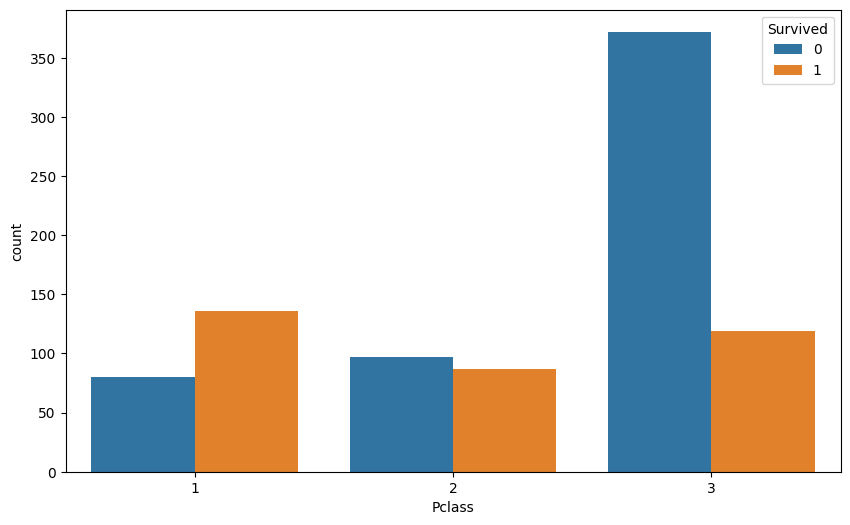

In [8]:
plt.figure(figsize=(10,6))
sns.countplot(x='Pclass',hue='Survived', data=train)  
plt.show()

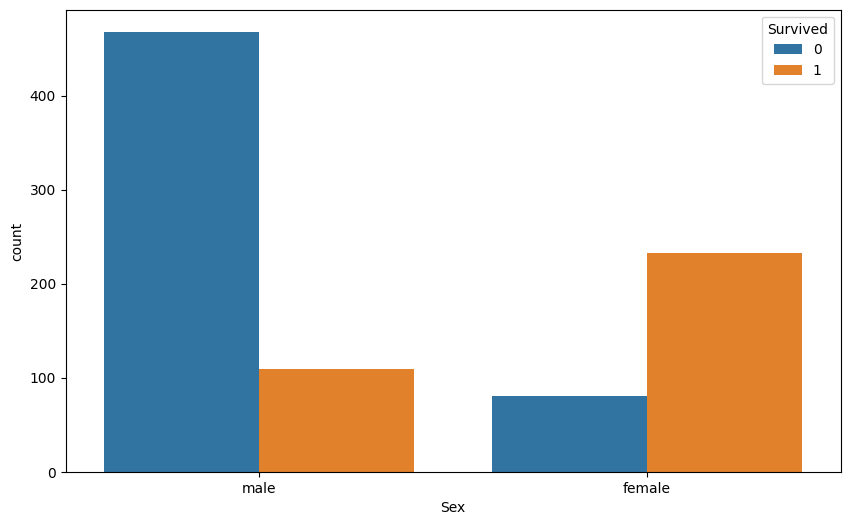

In [9]:
plt.figure(figsize=(10,6))
sns.countplot(x='Sex',hue='Survived', data=train)  
plt.show()

#here blue is 0 mean died.. and other color is that many survived 0 and 1 
#uto here we here completed categorical variables from now continuous variables

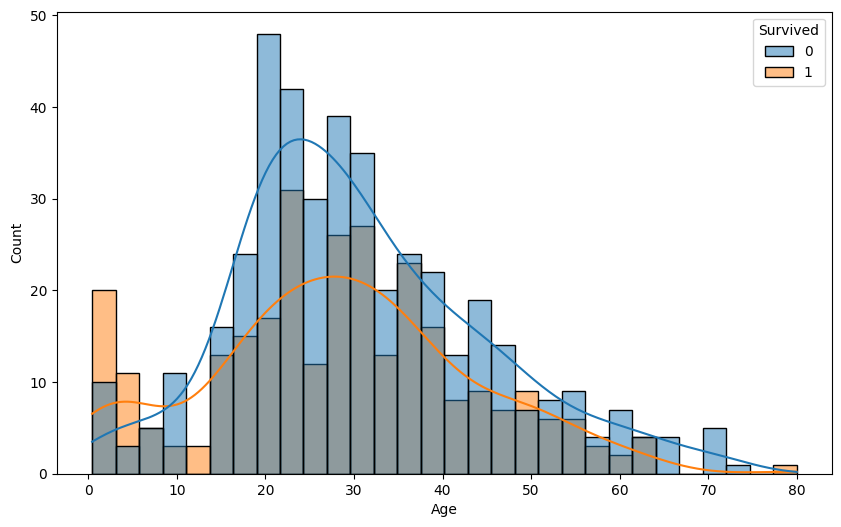

In [10]:

plt.figure(figsize=(10,6))
sns.histplot(data=train,x='Age',hue='Survived',kde=True,bins=30)
plt.show()
#here it will show like .. how many survived and how many died in the specific age group 
#assume like marks in a class od students .. how many will get 100, how many for 80 to 90.. so same like that we use here bell like curve's - like histogram's where we can see the distribution of data


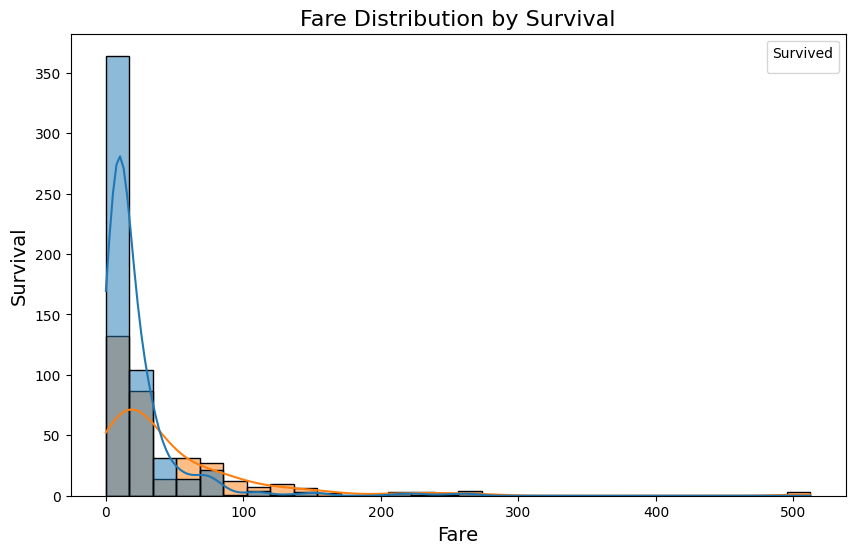

In [11]:
plt.figure(figsize=(10,6))
sns.histplot(data=train,x='Fare', hue='Survived', kde= True, bins= 30)
plt.title('Fare Distribution by Survival', fontsize=16)
plt.xlabel('Fare', fontsize=14)
plt.ylabel('Survival', fontsize=14)
plt.legend(title='Survived', loc='upper right')
plt.show()

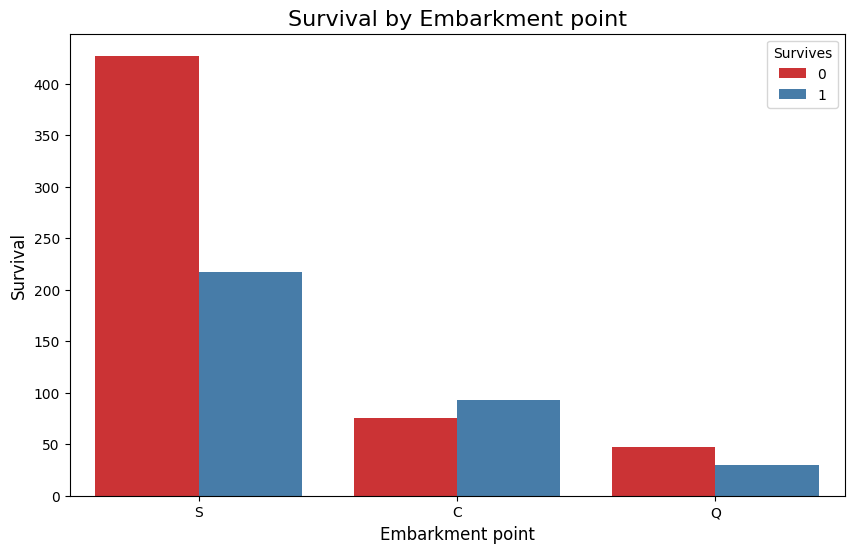

In [12]:
plt.figure(figsize=(10,6))
sns.countplot(x='Embarked', hue='Survived', data=train, palette='Set1')
plt.title('Survival by Embarkment point', fontsize=16)
plt.xlabel('Embarkment point', fontsize=12)
plt.ylabel('Survival', fontsize=12)
plt.legend(title='Survives', loc='upper right')
plt.show()

#embarkment is from where a passenger boarded the ship. so the plot is showing how many survived from each embarkment point.
#here blue is survived and other color is not survived. so c is the best embarkment point where most of the passengers survived.

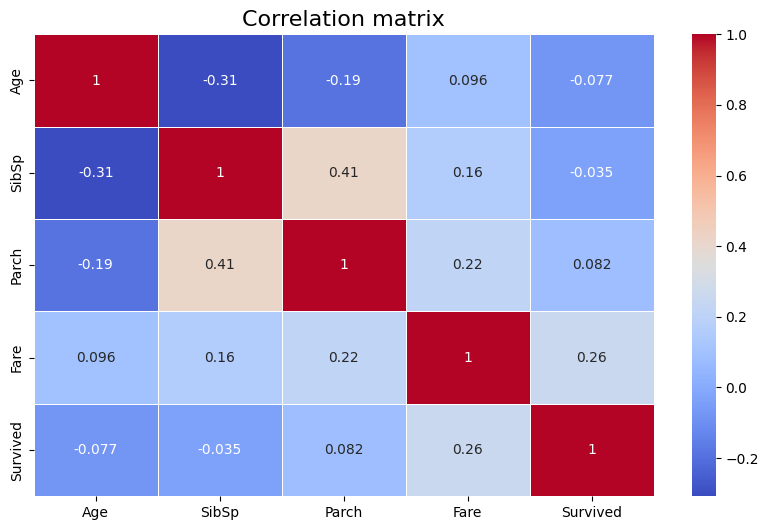

In [13]:
numerical_features=train[['Age', 'SibSp', 'Parch', 'Fare','Survived']]
plt.figure(figsize=(10,6))
correlation = numerical_features.corr()
sns.heatmap(correlation, annot=True,cmap='coolwarm', linewidths=0.5)
plt.title('Correlation matrix', fontsize= 16)
plt.show()


In [14]:
#Data Pre-processing
train_len=len(train)
df = pd.concat([train, test], axis = 0,)
df= df.reset_index(drop=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
df.tail(25)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1284,1285,NaN,2,"Gilbert, Mr. William",male,47.0,0,0,C.A. 30769,10.5000,NaN,S
1285,1286,NaN,3,"Kink-Heilmann, Mr. Anton",male,29.0,3,1,315153,22.0250,NaN,S
1286,1287,NaN,1,"Smith, Mrs. Lucien Philip (Mary Eloise Hughes)",female,18.0,1,0,13695,60.0000,C31,S
1287,1288,NaN,3,"Colbert, Mr. Patrick",male,24.0,0,0,371109,7.2500,NaN,Q
1288,1289,NaN,1,"Frolicher-Stehli, Mrs. Maxmillian (Margaretha ...",female,48.0,1,1,13567,79.2000,B41,C
1289,1290,NaN,3,"Larsson-Rondberg, Mr. Edvard A",male,22.0,0,0,347065,7.7750,NaN,S
1290,1291,NaN,3,"Conlon, Mr. Thomas Henry",male,31.0,0,0,21332,7.7333,NaN,Q
1291,1292,NaN,1,"Bonnell, Miss. Caroline",female,30.0,0,0,36928,164.8667,C7,S
1292,1293,NaN,2,"Gale, Mr. Harry",male,38.0,1,0,28664,21.0000,NaN,S
1293,1294,NaN,1,"Gibson, Miss. Dorothy Winifred",female,22.0,0,1,112378,59.4000,NaN,C


In [16]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [17]:
df = df.drop(columns=["Cabin"], axis=1)
#here with this i have removed the column cabin from the dataset.
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,S


In [18]:
df["Age"].mean()

np.float64(29.881137667304014)

In [19]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Fare'] = df['Fare'].fillna(df['Fare'].mean())


In [20]:
df.isnull().sum()
#checking after the column - cabin is removed



PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [21]:
df['Embarked'].mode()[0]

'S'

In [22]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [23]:
df['Fare'] = np.log(df['Fare'] +1)

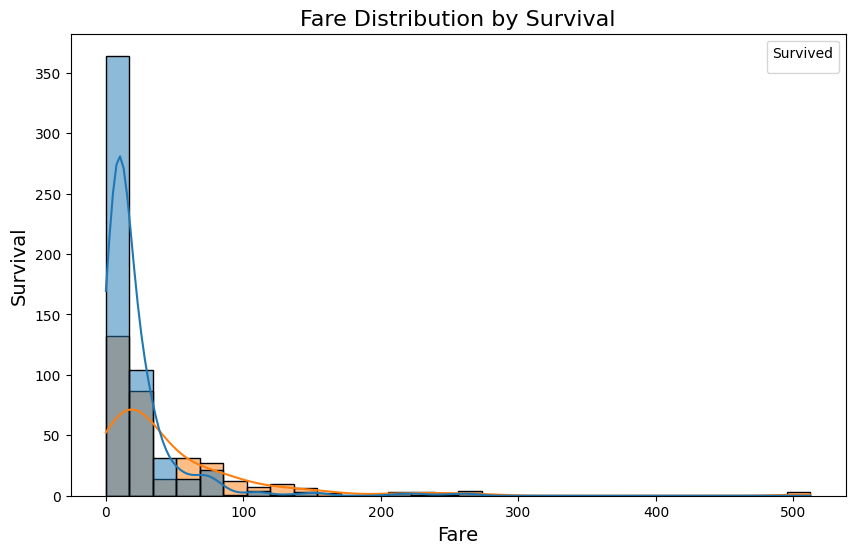

In [24]:
plt.figure(figsize=(10,6))
sns.histplot(data=train,x='Fare', hue='Survived', kde= True, bins= 30)
plt.title('Fare Distribution by Survival', fontsize=16)
plt.xlabel('Fare', fontsize=14)
plt.ylabel('Survival', fontsize=14)
plt.legend(title='Survived', loc='upper right')
plt.show()

#this is'nt a normal distribution. so we are using log transformation to make it a normal distribution. in simple words we will be normalizing the plot for our  model better performance!!

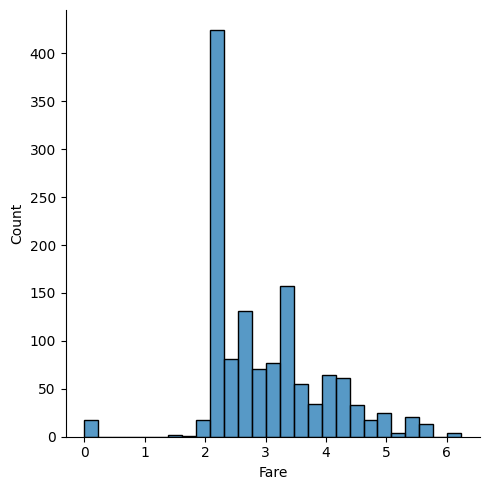

In [25]:
sns.displot(df['Fare'])
#better than the previous one. so we can use this for our model.

In [26]:
df.head()
#deom here we'll rempve some columns(name, ticket) which are not required for our model.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,2.110213,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.280593,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.188856,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.990834,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.202765,S


In [27]:
df = df.drop(columns = ['Name', 'Ticket'], axis = 1)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,male,22.0,1,0,2.110213,S
1,2,1.0,1,female,38.0,1,0,4.280593,C
2,3,1.0,3,female,26.0,0,0,2.188856,S
3,4,1.0,1,female,35.0,1,0,3.990834,S
4,5,0.0,3,male,35.0,0,0,2.202765,S


In [28]:
#so here model doesnt understand the categorical variables. so we need to convert them into numerical values. so we are using label encoding for that. (alphabets to numbers)
from sklearn.preprocessing import LabelEncoder
cols = ["Sex", "Embarked"]
le = LabelEncoder()  #important 
for col in cols:
    df[col] = le.fit_transform(df[col])
df.head()

#after the execution male = 1, female =0, c=0, q=1, s=2

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,1,22.0,1,0,2.110213,2
1,2,1.0,1,0,38.0,1,0,4.280593,0
2,3,1.0,3,0,26.0,0,0,2.188856,2
3,4,1.0,1,0,35.0,1,0,3.990834,2
4,5,0.0,3,1,35.0,0,0,2.202765,2


Train-test split

In [29]:
train = df.iloc[:train_len,:]
test = df.iloc[train_len:,]
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,1,22.0,1,0,2.110213,2
1,2,1.0,1,0,38.0,1,0,4.280593,0
2,3,1.0,3,0,26.0,0,0,2.188856,2
3,4,1.0,1,0,35.0,1,0,3.990834,2
4,5,0.0,3,1,35.0,0,0,2.202765,2


In [30]:
X = train.drop(columns = ["PassengerId", "Survived"], axis = 1)
Y = train["Survived"] 

#here for the x axis we use all the columns except passenger id and survived column. and for y axis we use only survived column. so we are separating the data into x and y axis.

# Model Traning 

In [31]:
from sklearn.model_selection import train_test_split, cross_val_score

def classify(model):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
    model.fit(X_train, Y_train)
    print("Accuracy: ",  model.score(X_test, Y_test))

    score = cross_val_score(model, X, Y, cv=5)
    print("Cross Validation Score: ", np.mean(score))

Testing on some Classical Machine Learning Model's

In [32]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model)

#here here we are getting the accuracy and cross validation score for the model. 

Accuracy:  0.7988826815642458
Cross Validation Score:  0.7833971502102819


In [33]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model)


Accuracy:  0.7821229050279329
Cross Validation Score:  0.765457284539577


In [34]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
classify(model)

Accuracy:  0.8212290502793296
Cross Validation Score:  0.8092461239093591


In [35]:
from sklearn.svm import SVC
model = SVC()
classify(model)

Accuracy:  0.6089385474860335
Cross Validation Score:  0.6835289686774214


In [36]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()  
classify(model)

Accuracy:  0.7877094972067039
Cross Validation Score:  0.7744397715146569


In [37]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
classify(model)   


Accuracy:  0.8212290502793296
Cross Validation Score:  0.793528340970435


upto here the models  we used are linear_model,  sklearn.tree,  sklearn.ensemble( RandomForestClassifier, ExtraTreesClassifier),   sklearn.svm, sklearn.neighbors  so all these  models are since 1970's soo now lets use the most presnt models  

In [38]:
from xgboost import XGBClassifier
model = XGBClassifier()
classify(model)

Accuracy:  0.8100558659217877
Cross Validation Score:  0.8159751428033394


In [39]:
from catboost import CatBoostClassifier
model = CatBoostClassifier()
classify(model)

Learning rate set to 0.008911
0:	learn: 0.6868498	total: 141ms	remaining: 2m 20s
1:	learn: 0.6803026	total: 145ms	remaining: 1m 12s
2:	learn: 0.6746090	total: 149ms	remaining: 49.4s
3:	learn: 0.6687542	total: 152ms	remaining: 37.8s
4:	learn: 0.6656102	total: 153ms	remaining: 30.5s
5:	learn: 0.6625263	total: 155ms	remaining: 25.7s
6:	learn: 0.6574375	total: 158ms	remaining: 22.4s
7:	learn: 0.6527244	total: 162ms	remaining: 20s
8:	learn: 0.6473326	total: 165ms	remaining: 18.1s
9:	learn: 0.6424096	total: 168ms	remaining: 16.6s
10:	learn: 0.6373435	total: 171ms	remaining: 15.4s
11:	learn: 0.6321620	total: 176ms	remaining: 14.5s
12:	learn: 0.6269365	total: 179ms	remaining: 13.6s
13:	learn: 0.6228128	total: 183ms	remaining: 12.9s
14:	learn: 0.6182286	total: 187ms	remaining: 12.3s
15:	learn: 0.6141351	total: 191ms	remaining: 11.7s
16:	learn: 0.6093184	total: 194ms	remaining: 11.2s
17:	learn: 0.6050425	total: 198ms	remaining: 10.8s
18:	learn: 0.6006824	total: 202ms	remaining: 10.4s
19:	learn: 

In [40]:
import joblib
joblib.dump(model, 'catboost_model.pkl')
#here we are saving the model in a file named catboost_model.pkl. so we can use this model for future predictions.
#here we are using catboost classifier for our model. so we are getting the accuracy and cross validation score for the model.

['catboost_model.pkl']

In [41]:
import joblib
joblib.dump(model, 'catboost_model.pkl')
print("Model saved successfully")

Model saved successfully


In [42]:
# #so now the model is trained and saved succesfully and used streamlit to deploy the model onto web! now this project is a basic start point as a beginers.. soo lets have some more features into it!!  we will include feature_importance tool into our project ? what it does?? let me explain u clearly. as we take few columns from the user to predict the output as served or not !! like we take diff diff data as Passenger Class, sex, Age. soo all that will contribute the predicted output!! but let us also know which factor contributed the most!! 
# SO FOR THAT WE WILL USE FACTOR_IMPORTANCES


In [43]:
with open('catboost_model.pkl', 'rb') as file:
    model = pickle.load(file)

feature_importances = model.get_feature_importance()
feature_names = X.columns 

In [44]:
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

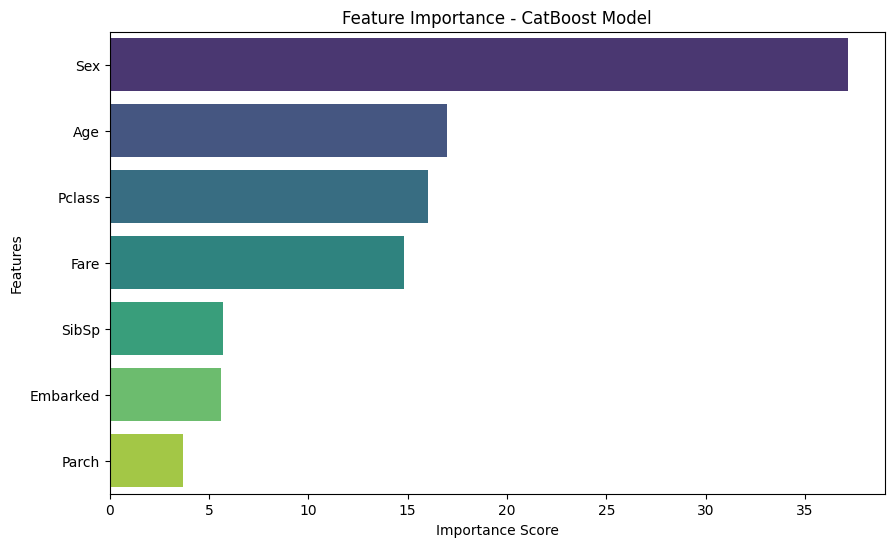

In [45]:
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='viridis')
plt.title('Feature Importance - CatBoost Model')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()